<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Perceptron_Trick_using_Sigmoid_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression By Perceptron Trick :--

In [38]:
from sklearn.datasets import  make_classification
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X,y=make_classification(
    n_samples=100,n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,
    hypercube=False, class_sep=20
    )

In [40]:
X.shape,y.shape

((100, 2), (100,))

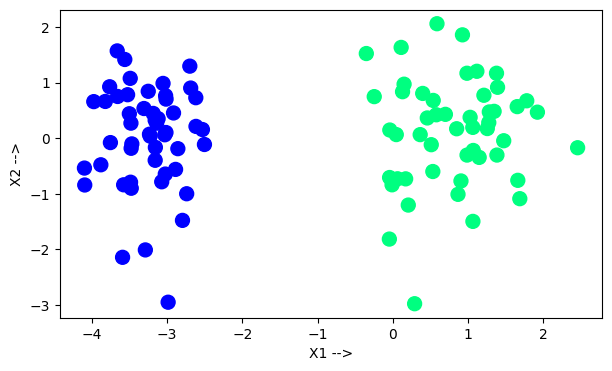

In [41]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.xlabel("X1 -->")
plt.ylabel("X2 -->")
plt.show()

##Logistic Regression by perceptron trick using step function :--

In [42]:
def perceptron_step(X,y):
  X=np.insert(X,0,1,axis=1)         #adding a column of 1's in X as 1st column
  weights=np.ones(X.shape[1])       #initializing weights to 1
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(X[j],weights))

    weights=weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]

In [43]:
def step(num):
  if num>=0:
    return 1
  else:
    return 0

In [44]:
intercept_,coef_=perceptron_step(X,y)

In [45]:
print("intercept_ :",intercept_,"\ncoef_ :",coef_)

intercept_ : 1.2000000000000002 
coef_ : [1.0580085  0.40381514]


In [46]:
m=-coef_[0]/coef_[1]        #For Ax + By+C= 0 ---> m=-A/B  and b=-C/B
b=-intercept_/coef_[1]

In [47]:
print("m :",m)
print("b :",b)

m : -2.6200317952788446
b : -2.9716568071029252


In [48]:
x_input=np.linspace(-3,3,100)
y_input1=m*x_input + b

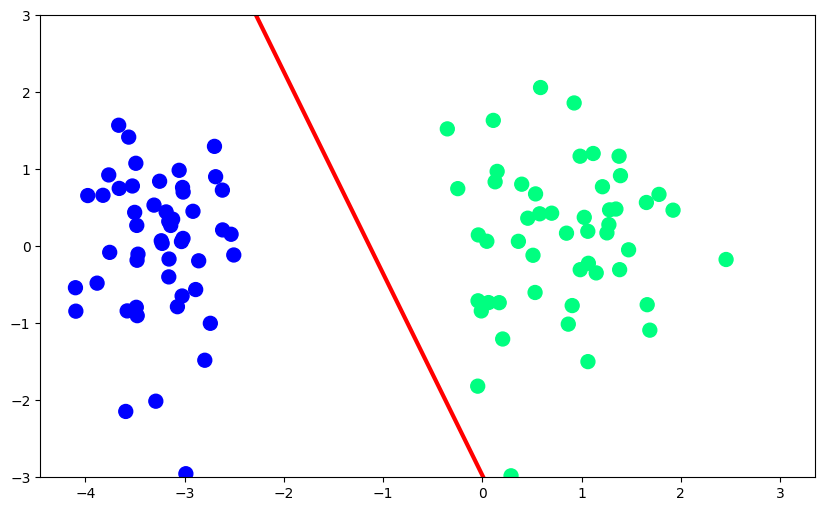

In [49]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,3)
plt.show()

##Logistic Regression by perceptron trick using sigmoid function :--

In [50]:
def perceptron_sigmoid(X,y):
  X=np.insert(X,0,1,axis=1)         #adding a column of 1's in X as 1st column
  weights=np.ones(X.shape[1])       #initializing weights to 1
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=sigmoid(np.dot(X[j],weights))

    weights=weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]

In [51]:
def sigmoid(z):
  y_hat=1/(1+np.exp(-z))
  return y_hat

In [52]:
intercept_,coef_=perceptron_sigmoid(X,y)

In [53]:
print("intercept_ :",intercept_,"\ncoef_ :",coef_)

intercept_ : 2.7852096074769013 
coef_ : [2.83622995 0.09324671]


In [54]:
m=-coef_[0]/coef_[1]        #For Ax + By+C= 0 ---> m=-A/B  and b=-C/B
b=-intercept_/coef_[1]

In [55]:
print("m :",m)
print("b :",b)

m : -30.41640706157321
b : -29.869252754304664


In [56]:
x_input=np.linspace(-3,3,100)
y_input2=m*x_input + b

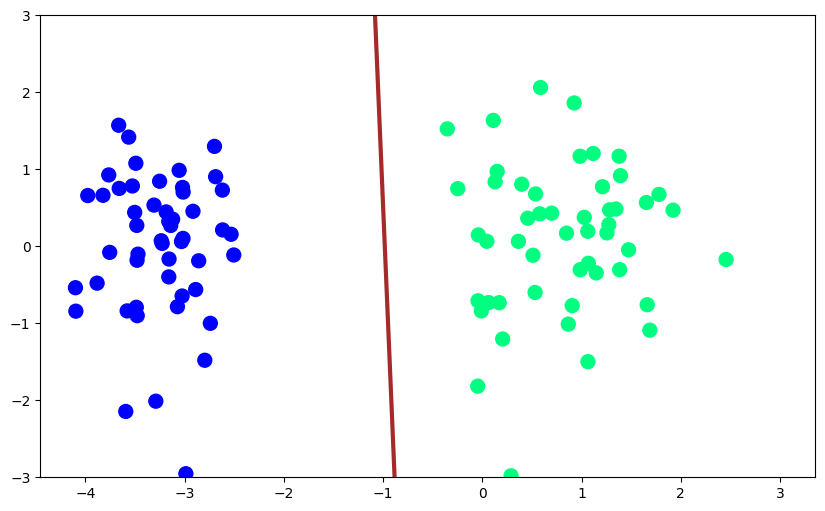

In [57]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,3)
plt.show()

##Logistic Regression by scikit learn LogisticRegression class :--

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [59]:
m=-lr.coef_[0][0]/lr.coef_[0][1]        #For Ax + By+C= 0 ---> m=-A/B  and b=-C/B
b=-lr.intercept_[0]/lr.coef_[0][1]

In [60]:
x_input=np.linspace(-3,3,100)
y_input3=m*x_input + b

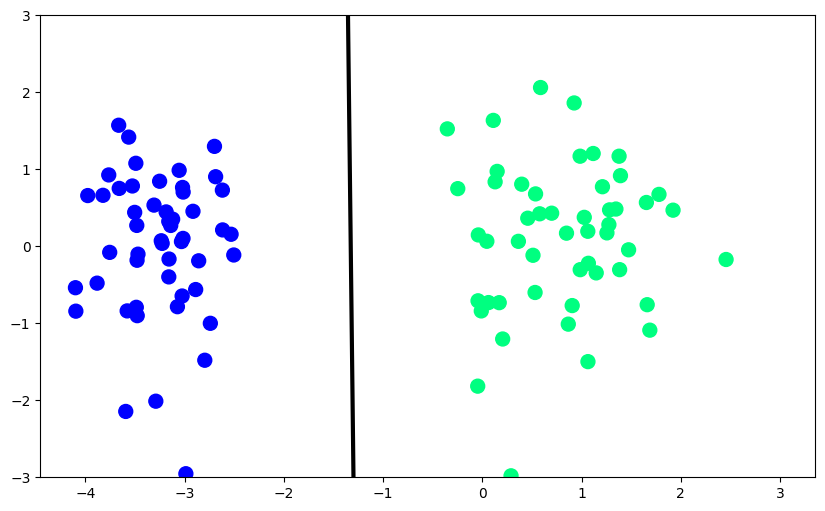

In [61]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input3,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,3)
plt.show()

##Lets plot all line in one figure:--

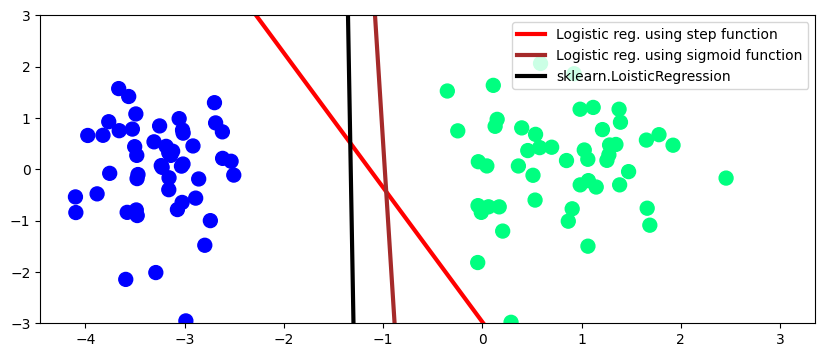

In [67]:
plt.figure(figsize=(10,4))
plt.plot(x_input,y_input1,color='red',linewidth=3,label="Logistic reg. using step function")
plt.plot(x_input,y_input2,color='brown',linewidth=3, label="Logistic reg. using sigmoid function")
plt.plot(x_input,y_input3,color='black',linewidth=3,label="sklearn.LoisticRegression")
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,3)
plt.legend(loc="upper right")
plt.show()

###even now you can see that sklearn.LogisticRegression class is best than both other.There is the reason that sklearn.LogisticRegression uses loss function for the best classifier line..